In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [2]:
FILE_PATH = 'data/entries.json'

import ast

all_entries = []
with open(FILE_PATH) as file:
    all_entries = json.loads(file.read(), strict=False)


In [17]:
#hard is hard condition, exp is easy condition
hard_start, exp_start = [], []
hard_finish, exp_finish = [], []
starts = [hard_start, exp_start]
finishes = [hard_finish, exp_finish]

for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']['conditionNumber']
        starts[condition].append(entry)
    else:
        condition = entry['data'][0]['conditionNumber']
        finishes[condition].append(entry)

print(len(hard_start), len(exp_start))
print(len(hard_finish), len(exp_finish))

193 141
175 127


In [18]:
hard_aha, hard_pleasant, hard_correct = [], [], [] #final ratings for the last anagram
hard_pleasant1, hard_pleasant2, hard_pleasant3, hard_pleasant4 = [], [], [],[]
hard_aha1, hard_aha2, hard_aha3, hard_aha4 = [], [], [],[]
hard_stimulus = []

test_stimulus_hard = []
test_stimulus_easy = []

for entry in hard_finish:
    entry_data = entry['data']
    #collect pleasantness ratings
    hard_stimulus.append(entry_data[4]['stimulus'][23:30])
    r1 = entry_data[5]['responses'] #get people's pleasant rating here
    hard_pleasant1.append(int(r1[6]))
    
    r2 = entry_data[9]['responses']
    hard_pleasant2.append(int(r2[6]))
    hard_stimulus.append(entry_data[8]['stimulus'][23:30])
    
    r3 = entry_data[13]['responses'] 
    hard_pleasant3.append(int(r3[6]))
    hard_stimulus.append(entry_data[12]['stimulus'][23:30])
    
    r4 = entry_data[17]['responses'] 
    hard_pleasant4.append(int(r4[6]))
    hard_stimulus.append(entry_data[16]['stimulus'][23:30])
    
    r5 = entry_data[21]['responses'] #pleasant response here
    hard_pleasant.append(int(r5[6]))

    a = True
    #collect aha ratings
    b = int(r1[6])+int(r2[6])+int(r3[6])+int(r4[6])
    #if b == 2 and int(r5[6]) == 1:
    r = entry_data[6]['responses'] #get people's aha rating here
    hard_aha1.append(int(r[6]))

    r = entry_data[10]['responses']
    hard_aha2.append(int(r[6]))

    r = entry_data[14]['responses'] 
    hard_aha3.append(int(r[6]))

    r = entry_data[18]['responses'] 
    hard_aha4.append(int(r[6]))

    rating = entry_data[22]['responses'] #aha response here
    hard_aha.append(rating[6])
    test_stimulus_hard.append(entry_data[20]['stimulus'])
            
exp_aha, exp_pleasant, exp_correct = [], [], []
exp_pleasant1, exp_pleasant2, exp_pleasant3, exp_pleasant4 = [], [], [],[]
exp_aha1, exp_aha2, exp_aha3, exp_aha4 = [], [], [],[]
easy_stimulus = []
for entry in exp_finish:

    entry_data = entry['data']                 
    #collect pleasantness ratings
    r1 = entry_data[5]['responses'] #get people's pleasant rating here
    exp_pleasant1.append(int(r1[6]))
    easy_stimulus.append(entry_data[4]['stimulus'])
    
    r2 = entry_data[9]['responses']
    exp_pleasant2.append(int(r2[6]))
    easy_stimulus.append(entry_data[8]['stimulus'])
                         
    r3 = entry_data[13]['responses'] 
    exp_pleasant3.append(int(r3[6]))
    easy_stimulus.append(entry_data[12]['stimulus'])
    
    r4 = entry_data[17]['responses'] 
    exp_pleasant4.append(int(r4[6]))
    easy_stimulus.append(entry_data[16]['stimulus'])                     

    r5 = entry_data[21]['responses'] #pleasant response here
    exp_pleasant.append(int(r5[6]))    
    
    #collect aha ratings
    b = int(r1[6])+int(r2[6])+int(r3[6])+int(r4[6])
    #if b == 3 and int(r5[6]) == 1:
    r = entry_data[6]['responses'] #get people's aha rating here
    exp_aha1.append(int(r[6]))

    r = entry_data[10]['responses']
    exp_aha2.append(int(r[6]))

    r = entry_data[14]['responses'] 
    exp_aha3.append(int(r[6]))

    r = entry_data[18]['responses'] 
    exp_aha4.append(int(r[6]))

    rating = entry_data[22]['responses'] #aha response here
    exp_aha.append(rating[6])
    test_stimulus_easy.append(entry_data[20]['stimulus'])
        
def clean(values):
    return [int(value)+1 for value in values]

hard_aha = clean(hard_aha)
exp_aha= clean(exp_aha)
          
print(len(hard_aha), len(exp_aha))

175 127


In [26]:
#analyze which hard stimulus generated more aha
hard_ahas = hard_aha1+hard_aha2+hard_aha3+hard_aha4
hard_pleasants = hard_pleasant1+hard_pleasant2+hard_pleasant3+hard_pleasant4

d = {'anagrams': hard_stimulus, 'ahas': hard_ahas, 'solved': hard_pleasants}
df = pd.DataFrame(data=d)
df.groupby(['anagrams']).mean()

,ahas,solved
anagrams,,
aneplix,1.183673,0.285714
dalrbeu,1.123188,0.253623
hnatuyg,0.808219,0.178082
iocnrag,1.343511,0.297710
"uefndr""",1.202899,0.275362


In [21]:
#analyze which Easy stimulus generated more aha
easy_ahas = exp_aha1+exp_aha2+exp_aha3+exp_aha4
easy_pleasants = exp_pleasant1+exp_pleasant2+exp_pleasant3+exp_pleasant4

d = {'anagrams': easy_stimulus, 'ahas': easy_ahas, 'solved': easy_pleasants}
df = pd.DataFrame(data=d)
df.groupby(['anagrams']).mean()

,ahas,solved
anagrams,,
"<blockquote>\n <h1 id=""betl"">BETL</h1>\n <p><br></p>\n</blockquote>",2.747573,0.970874
"<blockquote>\n <h1 id=""codl"">CODL</h1>\n <p><br></p>\n</blockquote>",2.500000,0.952830
"<blockquote>\n <h1 id=""fidn"">FIDN</h1>\n <p><br></p>\n</blockquote>",2.942857,0.923810
"<blockquote>\n <h1 id=""fodo"">FODO</h1>\n <p><br></p>\n</blockquote>",2.961538,0.951923
"<blockquote>\n <h1 id=""pitn"">PITN</h1>\n <p><br></p>\n</blockquote>",2.911111,0.911111


In [22]:
#g analyze if there is any item effect on the last anagram
d = {'anagrams': test_stimulus_easy, 'ahas': exp_aha}
df = pd.DataFrame(data=d)
df.groupby(['anagrams']).mean()

,ahas
anagrams,
"<blockquote>\n <h1 id=""bluk"">BLUK</h1>\n <p><br></p>\n</blockquote>",3.541667
"<blockquote>\n <h1 id=""brid"">BRID</h1>\n <p><br></p>\n</blockquote>",3.695652
"<blockquote>\n <h1 id=""glod"">GLOD</h1>\n <p><br></p>\n</blockquote>",3.560000
"<blockquote>\n <h1 id=""knig"">KNIG</h1>\n <p><br></p>\n</blockquote>",3.806452
"<blockquote>\n <h1 id=""sonw"">SONW</h1>\n <p><br></p>\n</blockquote>",3.625000


In [23]:
#g analyze if there is any item effect on the last anagram
d = {'anagrams': test_stimulus_hard, 'ahas': hard_aha}
df = pd.DataFrame(data=d)
df.groupby(['anagrams']).mean()

,ahas
anagrams,
"<blockquote>\n <h1 id=""bluk"">BLUK</h1>\n <p><br></p>\n</blockquote>",3.461538
"<blockquote>\n <h1 id=""brid"">BRID</h1>\n <p><br></p>\n</blockquote>",4.625000
"<blockquote>\n <h1 id=""glod"">GLOD</h1>\n <p><br></p>\n</blockquote>",4.454545
"<blockquote>\n <h1 id=""knig"">KNIG</h1>\n <p><br></p>\n</blockquote>",3.880952
"<blockquote>\n <h1 id=""sonw"">SONW</h1>\n <p><br></p>\n</blockquote>",4.137931


/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


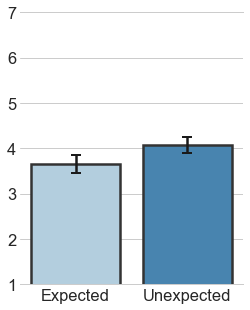

4.074285714285714 3.6535433070866143


In [24]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5, rc={'figure.figsize':(4,5), 
                                              "grid.linewidth": 1, "axes.linewidth": 1, 
                                              })

hard_aha_mean = np.mean(hard_aha)
hard_aha_error = stats.sem(hard_aha)
exp_aha_mean = np.mean(exp_aha)
exp_aha_error = stats.sem(exp_aha)

ax = sns.barplot(
    np.arange(2), 
    [exp_aha_mean, hard_aha_mean],
    yerr=[exp_aha_error, hard_aha_error],
    palette="Blues", errcolor=".2", edgecolor=".2",linewidth=2.5, error_kw=dict(ecolor='k', lw=2.5, capsize=5, capthick=2)
)
plt.xticks(np.arange(2), ['Expected','Unexpected'])
#ax.set(ylabel='Mean Aha! rating on the test anagram')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.ylim([1,7]) 
sns.despine(ax=ax, left=True, top=False)
plt.savefig('Aha_Exp2.png',dpi=1200)
plt.show()
print(hard_aha_mean, exp_aha_mean)


In [27]:
t, p = ttest_ind(hard_aha, exp_aha)
print(t, p)

1.652746898942206 0.09942849291247485


In [25]:
test_stimulus = test_stimulus_easy+test_stimulus_hard
aha = exp_aha+hard_aha
a = [1] * len(test_stimulus_hard)
b = [0] * len(test_stimulus_easy)
condition = b + a


d = {'anagrams': test_stimulus_hard, 'ahas': hard_aha}
df1 = pd.DataFrame(data=d)

d = {'anagrams': test_stimulus_easy, 'ahas': exp_aha}
df2 = pd.DataFrame(data=d)

d = {'anagrams': test_stimulus, 'ahas': aha, 'condition': condition}
df = pd.DataFrame(data=d)

df2.groupby(['anagrams']).count()

,ahas
anagrams,
"<blockquote>\n <h1 id=""bluk"">BLUK</h1>\n <p><br></p>\n</blockquote>",23
"<blockquote>\n <h1 id=""brid"">BRID</h1>\n <p><br></p>\n</blockquote>",23
"<blockquote>\n <h1 id=""glod"">GLOD</h1>\n <p><br></p>\n</blockquote>",23
"<blockquote>\n <h1 id=""knig"">KNIG</h1>\n <p><br></p>\n</blockquote>",29
"<blockquote>\n <h1 id=""sonw"">SONW</h1>\n <p><br></p>\n</blockquote>",24


In [26]:
#mixed effects linear model to test effect of condition and item on Aha! rating
import statsmodels.api as sm
import statsmodels.formula.api as smf                                                                                               

mixed = smf.mixedlm("ahas ~ condition", df, groups=df["anagrams"])
mixed_fit = mixed.fit()
#print the summary
mixed_fit.summary()

C:\Users\RACH0_000\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\RACH0_000\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2114: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
C:\Users\RACH0_000\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\RACH0_000\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2114: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
C:\Users\RACH0_000\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: ahas     
No. Observations: 238     Method:             REML     
No. Groups:       5       Scale:              4.2916   
Min. group size:  42      Log-Likelihood:     -511.6826
Max. group size:  55      Converged:          No       
Mean group size:  47.6                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     3.623    0.191 18.934 0.000  3.248  3.998
condition     0.844    0.275  3.074 0.002  0.306  1.382
Group Var     0.007    0.165                           
=======================================================

"""

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]


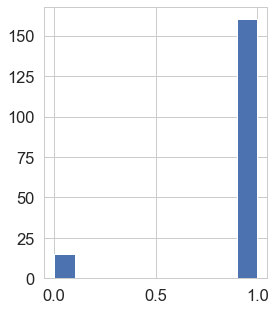

In [28]:
plt.hist(hard_pleasant)

print(hard_pleasant1)

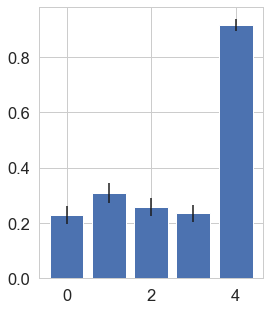

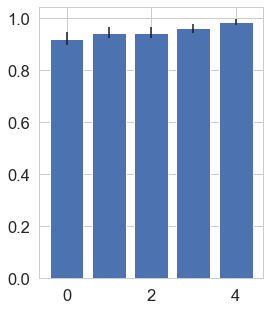

In [29]:
hard_pleasant_mean1 = np.mean(hard_pleasant1)
hard_pleasant_error1 = stats.sem(hard_pleasant1)
hard_pleasant_mean2 = np.mean(hard_pleasant2)
hard_pleasant_error2 = stats.sem(hard_pleasant2)
hard_pleasant_mean3 = np.mean(hard_pleasant3)
hard_pleasant_error3 = stats.sem(hard_pleasant3)
hard_pleasant_mean4 = np.mean(hard_pleasant4)
hard_pleasant_error4 = stats.sem(hard_pleasant4)
hard_pleasant_mean = np.mean(hard_pleasant) #final anagram
hard_pleasant_error = stats.sem(hard_pleasant)

plt.bar(
    np.arange(5),
    [hard_pleasant_mean1, hard_pleasant_mean2, hard_pleasant_mean3, hard_pleasant_mean4, hard_pleasant_mean],
    yerr=[hard_pleasant_error1, hard_pleasant_error2, hard_pleasant_error3, hard_pleasant_error4, hard_pleasant_error]
)
plt.show()

plt.figure(2)

exp_pleasant_mean1 = np.mean(exp_pleasant1)
exp_pleasant_error1 = stats.sem(exp_pleasant1)
exp_pleasant_mean2 = np.mean(exp_pleasant2)
exp_pleasant_error2 = stats.sem(exp_pleasant2)
exp_pleasant_mean3 = np.mean(exp_pleasant3)
exp_pleasant_error3 = stats.sem(exp_pleasant3)
exp_pleasant_mean4 = np.mean(exp_pleasant4)
exp_pleasant_error4 = stats.sem(exp_pleasant4)
exp_pleasant_mean = np.mean(exp_pleasant) #final anagram
exp_pleasant_error = stats.sem(exp_pleasant)

plt.bar(
    np.arange(5),
    [exp_pleasant_mean1, exp_pleasant_mean2, exp_pleasant_mean3, exp_pleasant_mean4, exp_pleasant_mean],
    yerr=[exp_pleasant_error1, exp_pleasant_error2, exp_pleasant_error3, exp_pleasant_error4, exp_pleasant_error]
)
plt.show()


/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


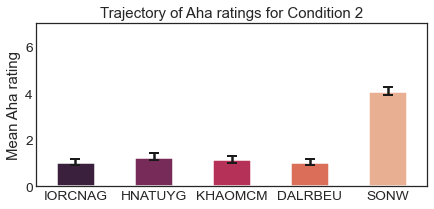

/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


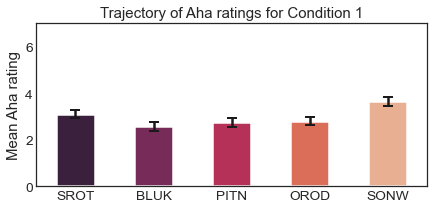

In [30]:
import seaborn as sns
sns.set(style="white", font_scale=1.25, rc={'figure.figsize':(7,3)})

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

hard_aha_mean1 = np.mean(hard_aha1)
hard_aha_error1 = stats.sem(hard_aha1)
hard_aha_mean2 = np.mean(hard_aha2)
hard_aha_error2 = stats.sem(hard_aha2)
hard_aha_mean3 = np.mean(hard_aha3)
hard_aha_error3 = stats.sem(hard_aha3)
hard_aha_mean4 = np.mean(hard_aha4)
hard_aha_error4 = stats.sem(hard_aha4)
hard_aha_mean = np.mean(hard_aha) #final anagram
hard_aha_error = stats.sem(hard_aha)

ax = sns.barplot(
    np.arange(5),
    [hard_aha_mean1, hard_aha_mean2, hard_aha_mean3, hard_aha_mean4, hard_aha_mean],
    yerr=[hard_aha_error1, hard_aha_error2, hard_aha_error3, hard_aha_error4, hard_aha_error],
    palette="rocket", linewidth=2.5, error_kw=dict(ecolor='k', lw=2.5, capsize=5, capthick=2)
)

plt.xticks(np.arange(5), ['IORCNAG','HNATUYG', 'KHAOMCM','DALRBEU','SONW'])
ax.set(title = 'Trajectory of Aha ratings for Condition 2', ylabel='Mean Aha rating')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.ylim([0,7]) 
change_width(ax, .5)
plt.show()

plt.figure(2)

exp_aha_mean1 = np.mean(exp_aha1)
exp_aha_error1 = stats.sem(exp_aha1)
exp_aha_mean2 = np.mean(exp_aha2)
exp_aha_error2 = stats.sem(exp_aha2)
exp_aha_mean3 = np.mean(exp_aha3)
exp_aha_error3 = stats.sem(exp_aha3)
exp_aha_mean4 = np.mean(exp_aha4)
exp_aha_error4 = stats.sem(exp_aha4)
exp_aha_mean = np.mean(exp_aha) #final anagram
exp_aha_error = stats.sem(exp_aha)

ax = sns.barplot(
    np.arange(5),
    [exp_aha_mean1, exp_aha_mean2, exp_aha_mean3, exp_aha_mean4, exp_aha_mean],
    yerr=[exp_aha_error1, exp_aha_error2, exp_aha_error3, exp_aha_error4, exp_aha_error],
    palette="rocket", linewidth=2.5, error_kw=dict(ecolor='k', lw=2.5, capsize=5, capthick=2)
)
plt.xticks(np.arange(5), ['SROT','BLUK', 'PITN','OROD','SONW'])
ax.set(title = 'Trajectory of Aha ratings for Condition 1', ylabel='Mean Aha rating')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.ylim([0,7]) 
change_width(ax, .5)
plt.show()
